In [99]:
# 2020 May 30 - Fitting a height-diameter scaling to the data from Lorenz (2013)
# https://ui.adsabs.harvard.edu/abs/2013Icar..226..964L/abstract

%matplotlib inline

import numpy as np
from numpy.random import uniform
from scipy.optimize import curve_fit
from scipy.stats import chisquare

from scipy.odr import *

import matplotlib.pyplot as plt

BoiseState_blue = '#0033A0'
BoiseState_orange = '#D64309'
aspect_ratio = 16./9

In [2]:
# Table 1 - numbers from Flower (1936)
min_diameters = np.array([0., 5., 10., 20., 40., 80., 150.])*0.3048 # feet to meters
max_diameters = np.array([5., 10., 20., 40., 80., 150., 300.])*0.3048 # feet to meters
mean_diameters = 0.5*(max_diameters + min_diameters)

min_heights = np.array([0., 5., 10., 20., 40., 80., 150., 300., 500., 1000., 2000., 3000.])*0.3048
max_heights = np.array([5., 10., 20., 40., 80., 150., 300., 500., 1000., 2000., 3000., 4000.])*0.3048
mean_heights = 0.5*(max_diameters + min_diameters)

counts = np.array([[11, 6, 4, 1, 0, 2, 2, 0, 0, 0, 0, 0], 
                   [3, 10, 4, 3, 3, 7, 2, 1, 4, 0, 0, 0], 
                   [2, 3, 3, 3, 10, 8, 5, 5, 4, 3, 0, 0], 
                   [0, 0, 5, 4, 8, 9, 5, 3, 6, 3, 0, 0], 
                   [0, 0, 0, 1, 3, 6, 12, 4, 2, 7, 1, 0], 
                   [0, 0, 0, 1, 1, 2, 2, 6, 7, 2, 1, 1], 
                   [0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0]])

In [108]:
def linfit(x, m, b):
    return m*x + b

# Define a function to fit the data with.
def lin_func(p, x):
    m, c = p
    return m*x + c

def chisqg(ydata,ymod,sd=1.):  
    """  
    Returns the chi-square error statistic as the sum of squared errors between  
    Ydata(i) and Ymodel(i). If individual standard deviations (array sd) are supplied,   
    then the chi-square error statistic is computed as the sum of squared errors  
    divided by the standard deviations.     Inspired on the IDL procedure linfit.pro.  
    See http://en.wikipedia.org/wiki/Goodness_of_fit for reference.  

    x,y,sd assumed to be Numpy arrays. a,b scalars.  
    Returns the float chisq with the chi-square statistic.  

    Rodrigo Nemmen  
    http://goo.gl/8S1Oo  
    """  
    # Chi-square statistic (Bevington, eq. 6.9)  
    chisq=np.sum( ((ydata-ymod)/sd)**2 )  

    return chisq  

[0.79729159 0.542944  ]
[0.0892067  0.07418506]
3.3326149722343397
chi-squared for power-law fit:  72414.70891208496


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


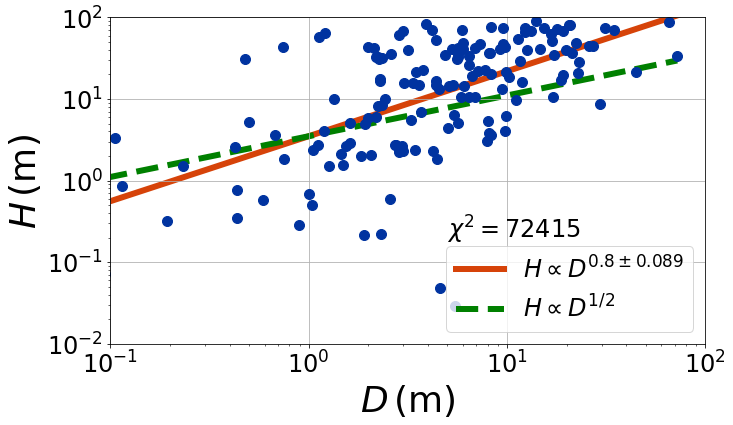

In [71]:
diameters = np.array([])
heights = np.array([])

for i in range(len(mean_diameters)):
    for j in range(len(mean_heights)):
#         diameters = np.append(diameters, np.ones(counts[i,j])*mean_diameters[i])
#         heights = np.append(heights, np.ones(counts[i,j])*mean_heights[j])

        for k in range(counts[i,j]):
            diameters = np.append(diameters, uniform(min_diameters[i], max_diameters[i]))
            heights = np.append(heights, uniform(min_heights[j], max_heights[j]))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.loglog(diameters, heights, marker='.', color=BoiseState_blue, ls='', markersize=20)
# ax.errorbar(diameters, heights, xerr=diameter_errs, yerr=height_errs, ls='')
popt, pcov = curve_fit(linfit, np.log10(diameters), np.log10(heights))
print(popt)
errs = np.diag(np.sqrt(pcov))
print(errs)
print((popt[0] - 0.5)/errs[0])

x = np.sort(diameters)
ax.loglog(x, 10**(popt[1])*x**popt[0], color=BoiseState_orange, lw=6, zorder=-1, 
        label="$H \\propto D^{%.2g\\pm%.2g}$" % (popt[0], errs[0]))
ax.loglog(x, 10**(popt[1])*x**0.5, color='green', ls='--', lw=6, zorder=-1, 
        label="$H \\propto D^{1/2}$")

ax.tick_params(which="both", labelsize=24)
ax.set_xlabel("$D\,{\\rm (m)}$", fontsize=36)
ax.set_ylabel("$H\,{\\rm (m)}$", fontsize=36)
ax.grid(True)
ax.legend(loc='lower right', fontsize=24)
ax.set_ylim([0.01, 100])
ax.set_xlim([0.1, 100])

chisq = chisqg(heights, 10**(popt[1])*x**popt[0])
ax.text(5, 0.2, "$\\chi^2 = %5.0f$" % (chisq), fontsize=24)
print("chi-squared for power-law fit: ", chisqg(heights, 10**(popt[1])*x**popt[0]))

# fig.savefig("Synthetic_Data_from_Flowers.png", dpi=500, bbox_inches="tight")

[0.77246717 0.57879244]
[0.08344841 0.06881602]
3.2650970510235173
chi-squared for power-law fit:  572.2901925474685


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


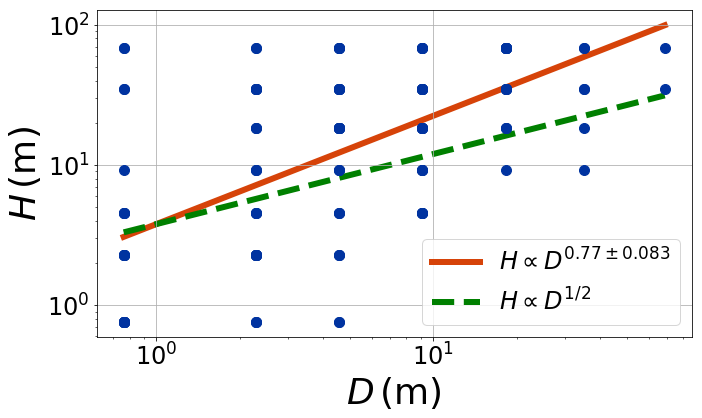

In [107]:
diameters = np.array([])
heights = np.array([])

for i in range(len(mean_diameters)):
    for j in range(len(mean_heights)):
        diameters = np.append(diameters, np.ones(counts[i,j])*mean_diameters[i])
        heights = np.append(heights, np.ones(counts[i,j])*mean_heights[j])

#         for k in range(counts[i,j]):
#             diameters = np.append(diameters, uniform(min_diameters[i], max_diameters[i]))
#             heights = np.append(heights, uniform(min_heights[j], max_heights[j]))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.loglog(diameters, heights, marker='.', color=BoiseState_blue, ls='', markersize=20)
# ax.errorbar(diameters, heights, xerr=diameter_errs, yerr=height_errs, ls='')
popt, pcov = curve_fit(linfit, np.log10(diameters), np.log10(heights))
print(popt)
errs = np.diag(np.sqrt(pcov))
print(errs)
print((popt[0] - 0.5)/errs[0])

x = np.sort(diameters)
ax.loglog(x, 10**(popt[1])*x**popt[0], color=BoiseState_orange, lw=6, zorder=-1, 
        label="$H \\propto D^{%.2g\\pm%.2g}$" % (popt[0], errs[0]))
ax.loglog(x, 10**(popt[1])*x**0.5, color='green', ls='--', lw=6, zorder=-1, 
        label="$H \\propto D^{1/2}$")

ax.tick_params(which="both", labelsize=24)
ax.set_xlabel("$D\,{\\rm (m)}$", fontsize=36)
ax.set_ylabel("$H\,{\\rm (m)}$", fontsize=36)
ax.grid(True)
ax.legend(loc='best', fontsize=24)

print("chi-squared for power-law fit: ", chisqg(heights, 10**(popt[1])*x**popt[0])/(x.size - 1. - popt.size))

# fig.savefig("Original_Data_from_Flowers.png", dpi=500, bbox_inches="tight")

[ 0.93162192 17.8199026 ]
[0.17056555 2.29174953]
2.530533953918492
chi-squared for linear fit:  494.4901436593604


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


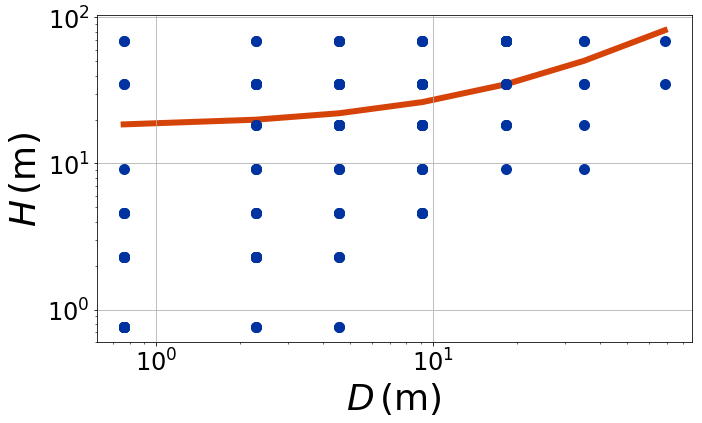

In [106]:
diameters = np.array([])
heights = np.array([])

for i in range(len(mean_diameters)):
    for j in range(len(mean_heights)):
        diameters = np.append(diameters, np.ones(counts[i,j])*mean_diameters[i])
        heights = np.append(heights, np.ones(counts[i,j])*mean_heights[j])

#         for k in range(counts[i,j]):
#             diameters = np.append(diameters, uniform(min_diameters[i], max_diameters[i]))
#             heights = np.append(heights, uniform(min_heights[j], max_heights[j]))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.loglog(diameters, heights, marker='.', color=BoiseState_blue, ls='', markersize=20)
# ax.errorbar(diameters, heights, xerr=diameter_errs, yerr=height_errs, ls='')
popt, pcov = curve_fit(linfit, diameters, heights)
print(popt)
errs = np.diag(np.sqrt(pcov))
print(errs)
print((popt[0] - 0.5)/errs[0])

x = np.sort(diameters)
ax.loglog(x, np.polyval(popt, x), color=BoiseState_orange, lw=6, zorder=-1, 
        label="$H = \\left( {%.2g\\pm%.2g} \\right) D\ + \\left( {%.2g\\pm%.2g} \\right)$" %\
          (popt[0], errs[0], popt[1], errs[1]))

ax.tick_params(which="both", labelsize=24)
ax.set_xlabel("$D\,{\\rm (m)}$", fontsize=36)
ax.set_ylabel("$H\,{\\rm (m)}$", fontsize=36)
ax.grid(True)

# ax.set_ylim([0.1, 100])
# ax.set_xlim([0.1, 100])

chisq = chisqg(heights, np.polyval(popt, x))
# ax.text(5, 0.2, "$\\chi^2 = %5.0f$" % (chisq), fontsize=24)
print("chi-squared for linear fit: ", chisqg(heights, np.polyval(popt, x))/(x.size - 1. - popt.size))

# fig.savefig("Original_Data_from_Flowers.png", dpi=500, bbox_inches="tight")

[9.99261466e-02 1.29426827e+02]
[ 0.01316252 11.05979437]
chi-squared for linear fit:  2.388473343038755


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


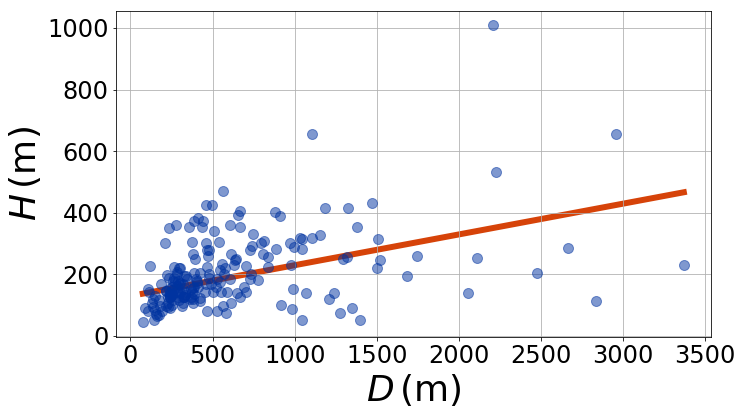

In [123]:
# 2020 May 31 - Looking again at the Stanzel data - linear fit
data = np.genfromtxt("Stanzel2008_Table1_conditioned.txt", delimiter=",", names=True)
ind = ~np.isnan(data['Height'])
x = data['Height'][ind]
y = data['Diameter'][ind]
x_unc = data['Height_unc'][ind]
y_unc = data['Diameter_unc'][ind]

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(x, y, marker='.', color=BoiseState_blue, ls='', markersize=20, alpha=0.5)
# ax.errorbar(diameters, heights, xerr=diameter_errs, yerr=height_errs, ls='')
popt, pcov = curve_fit(linfit, x, y, sigma=y_unc)
print(popt)
errs = np.diag(np.sqrt(pcov))
print(errs)

ax.plot(np.sort(x), np.polyval(popt, np.sort(x)), color=BoiseState_orange, lw=6, zorder=-1, 
        label="$H = \\left( {%.2g\\pm%.2g} \\right) D\ + \\left( {%.2g\\pm%.2g} \\right)$" %\
          (popt[0], errs[0], popt[1], errs[1]))

ax.tick_params(which="both", labelsize=24)
ax.set_xlabel("$D\,{\\rm (m)}$", fontsize=36)
ax.set_ylabel("$H\,{\\rm (m)}$", fontsize=36)
ax.grid(True)

# ax.set_ylim([0.1, 100])
# ax.set_xlim([0.1, 100])
chisq = chisqg(y, np.polyval(popt, x), sd=y_unc)
# ax.text(5, 0.2, "$\\chi^2 = %5.0f$" % (chisq), fontsize=24)
print("chi-squared for linear fit: ", chisqg(y, np.polyval(popt, x), sd=y_unc)/(x.size - 1. - popt.size))

# fig.savefig("Original_Data_from_Flowers.png", dpi=500, bbox_inches="tight")

[0.32878904 1.37695378]
[0.04522883 0.12186501]
chi-squared for power-law fit:  3.7221685660039627


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


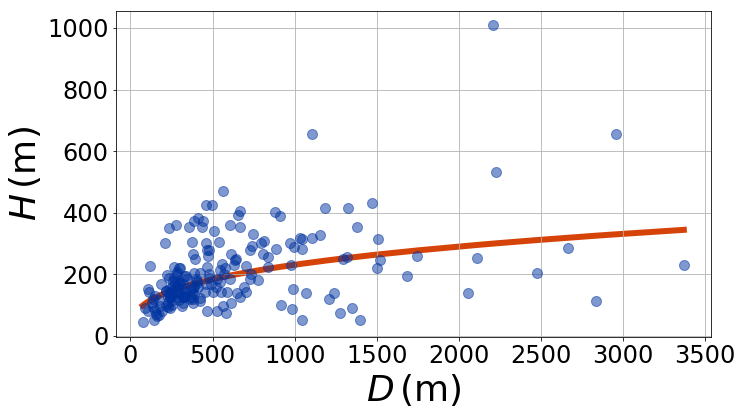

In [124]:
# 2020 May 31 - Looking again at the Stanzel data - power fit
data = np.genfromtxt("Stanzel2008_Table1_conditioned.txt", delimiter=",", names=True)
ind = ~np.isnan(data['Height'])
x = data['Height'][ind]
y = data['Diameter'][ind]
x_unc = data['Height_unc'][ind]
y_unc = data['Diameter_unc'][ind]

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(x, y, marker='.', color=BoiseState_blue, ls='', markersize=20, alpha=0.5)
# ax.errorbar(diameters, heights, xerr=diameter_errs, yerr=height_errs, ls='')
log10_x_unc = data['Height_unc'][ind]/(x*np.log(10.))
log10_y_unc = data['Diameter_unc'][ind]/(y*np.log(10.))
y_unc = data['Diameter_unc'][ind]
popt, pcov = curve_fit(linfit, np.log10(x), np.log10(y))
print(popt)
errs = np.diag(np.sqrt(pcov))
print(errs)

ax.plot(np.sort(x), 10.**popt[1]*np.sort(x)**popt[0], color=BoiseState_orange, lw=6, zorder=-1, 
        label="$H = \\left( {%.2g\\pm%.2g} \\right) D\ + \\left( {%.2g\\pm%.2g} \\right)$" %\
          (popt[0], errs[0], popt[1], errs[1]))

ax.tick_params(which="both", labelsize=24)
ax.set_xlabel("$D\,{\\rm (m)}$", fontsize=36)
ax.set_ylabel("$H\,{\\rm (m)}$", fontsize=36)
ax.grid(True)

# ax.set_ylim([0.1, 100])
# ax.set_xlim([0.1, 100])
chisq = chisqg(y, np.polyval(popt, x), sd=y_unc)
# ax.text(5, 0.2, "$\\chi^2 = %5.0f$" % (chisq), fontsize=24)
print("chi-squared for power-law fit: ", chisqg(y, 10.**popt[1]*np.sort(x)**popt[0], sd=y_unc)/\
      (x.size - 1. - popt.size))

# fig.savefig("Original_Data_from_Flowers.png", dpi=500, bbox_inches="tight")